# A short user guide to python tools for visualization and analysis of interferometric data

* ```Interferogram``` class deals with 1D interferograms (time-series data).
* It provides functionality for reading and analysis of such datasets as well for simualtion
* Current analysis tools:
    - Fourier transform
    - Wigner-Ville transform
* Simulations:
    - Pulse profile
    - Interferogram
    

In [1]:
#import packages
import sys
import glob, os
from parse import parse

# set source path
codepath = os.path.abspath("/Users/Pavel/Documents/repos/signal-processing")
if codepath not in sys.path:
    sys.path.append(codepath)

#automatically track changes in the source code
%load_ext autoreload
%autoreload 2

# Experimenal inerferograms

In [2]:
from Interferogram.classes.interferogram import Interferogram

## Display a specific dataset in the current directory

* Initialize an instance of the class by providing all relevant arguments to ```ifgm = Interferogram()```

    * Provide the datapath to a directory of interest
    * Provide the filename to read
    * Set the units of time  and the time step used whilst recording the data


* Read 1D interferometric data by calling the ```read_data()``` method with empty arguments on the instance of the initialized class.              
        
        
* Display the dataset by calling the ```display()```module on the instance of the class. This will automatically compute the 1D Fourier transform of the dataset and display it.

    * Specify the relevant arguments such as the wavelength range to display and the units. 
    * By setting ```vs_wavelength = True ```  one sets the Fourier data to be displayed as a function of wavelength instead of frequency
    * To turn off the display of the temporal data, set ```temporal_data=False```
    * For details see ```help(ifgm.display)```

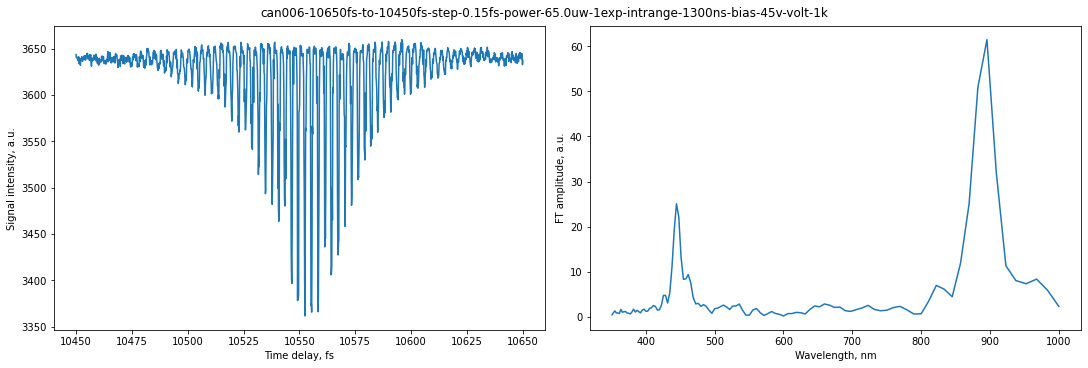

In [8]:
datapath = os.path.abspath("/Users/Pavel/Documents/repos/signal-processing/Interferogram/data/")
filename = "20211014scan006-10650fs-to-10450fs-step-0.15fs-power-65.0uw-1exp-intrange-1300ns-bias-45v-volt-1k.txt"

ifgm = Interferogram(pathtodata = datapath, 
                     filetoread = filename, 
                     time_units = "fs", 
                     time_step = 0.15)
ifgm.read_data()
ifgm.display(vs_wavelength=True, 
             wav_min = 350, 
             wav_max = 1000, 
             wav_units = "nm")

## Display all data in any directory

You can also read, analyse and display all data in any directory of interest. It is assumed though that **all data were recorded using the same units of time** (e.g. all datasets have units of e.g. fs)

* Initialize an instance of the class by providing the relevant arguments to ```ifgm = Interferogram()```

    * Provide the datapath to a directory of interest
    * Set the unit of time used whilst recording the data
    * DO NOT set the ```filetoread``` and the ```time_step``` arguments - the code will find them out automatically whilst reading out the data sets.

* Read, analyse and display the dataset by calling the ```display_all()``` module on the instance of the initialized class using the same arguments as with the ```display()``` module.


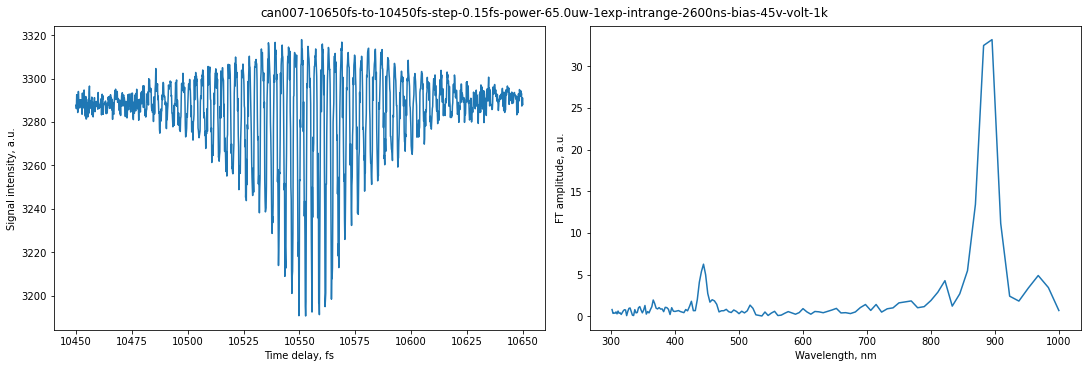

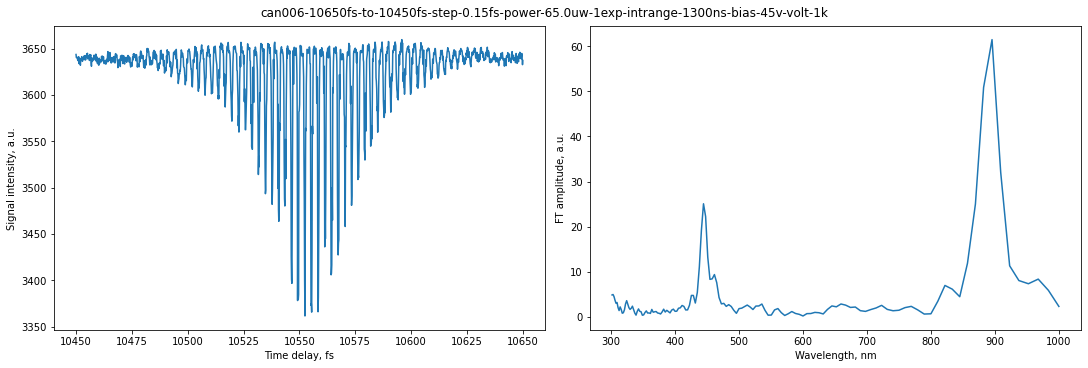

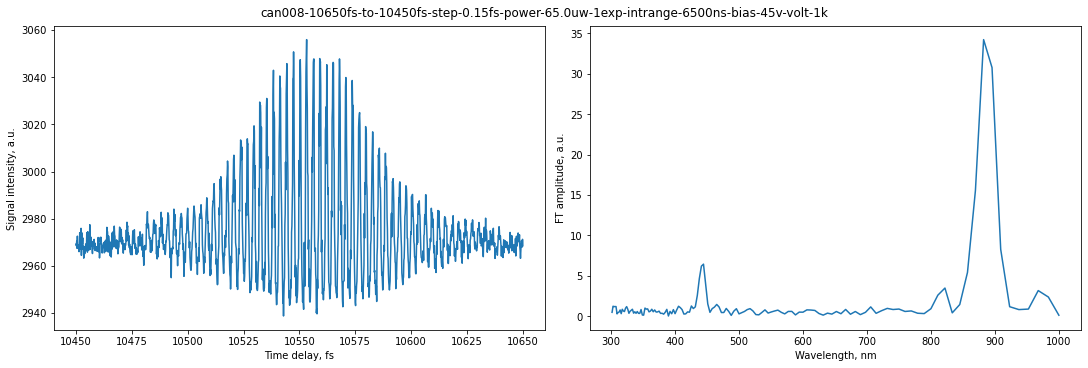

In [10]:
datapath = os.path.abspath("/Users/Pavel/Documents/repos/signal-processing/Interferogram/data/")

ifgm = Interferogram(pathtodata = datapath, time_units = "fs")

ifgm.display_all(vs_wavelength=True, wav_min=300, wav_max=1000, wav_units="nm")

# Simulated interferograms 

In [139]:
from Interferogram.classes.simulation import Simulation

* Set arguments upon the initialization of the Simulation class. See more info in the docstring.

In [142]:
sim = Simulation(lambd=800e-9, t_fwhm=100e-15, t_phase=0, 
                 t_start=-350e-15, t_end=350e-15, delta_t=0.1e-15,
                 tau_start=-350e-15, tau_end=350e-15, delta_tau=0.1e-15)

* Generate an electric field pulse by calling ```gen_e_field```method on he initialised class instance.
* There is an option of displaying the pulse by setting ```plotting=True```


/Users/Pavel/anaconda3/envs/signal-processing/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


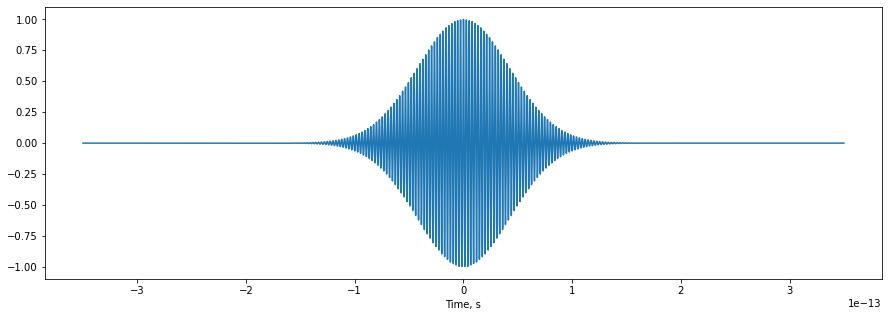

In [144]:
sim.gen_e_field(plotting=True);

* Generate an interferogram by calling ```gen_interferogram``` method on the initialised class instance.
* There is an option of displaying the pulse by setting ```plotting=True```


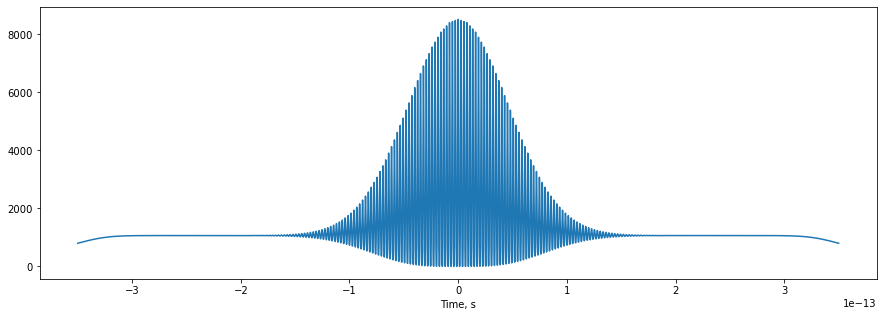

In [145]:
sim.gen_interferogram(plotting=True)